# First phase
## Data preprocessing
The overall dataset contains over 7000 movies, but 3000 of them are suitable for training since the the `revenue` attribute is included.  
Let's have a look to the train dataset:

In [1]:
import pandas as pd
import json
import ast    #Abstract Syntax Tree
import itertools
import numpy as np  
from sklearn.datasets import make_blobs  
from sklearn.neighbors import NearestNeighbors  
from sklearn.cluster import DBSCAN  
from matplotlib import pyplot as plt  
import seaborn as sns 
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
%matplotlib inline

sns.set()
pd.set_option('display.max_columns', None)


In [2]:
train_set = pd.read_csv('tmdb-box-office-prediction/train.csv')
test_set = pd.read_csv('tmdb-box-office-prediction/test.csv')
train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [3]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [4]:
for date,title,index in zip (test_set['release_date'], test_set['title'], enumerate(test_set['release_date'])):
    if not type(date) == str:
        print(title, index)

Jails, Hospitals & Hip-Hop (828, nan)


In [5]:
test_set['release_date'][828] = '05/01/00'

<ipython-input-5-ea3b8ac845d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set['release_date'][828] = '05/01/00'


In [6]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

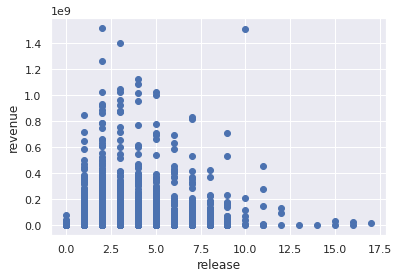

In [116]:
# Let's plot the data now
#x = train_set['release_date']
x = [len(train_set['production_companies'][i]) for i in range(len(train_set['production_companies']))]
y = train_set['revenue']

plt.scatter(x,y)
plt.xlabel("release")
plt.ylabel("revenue")
plt.show()

From the above result we can see that we don't have to deal with many missing values. In the dataset there are a lot of null values for attributes `belongs_to_collection` and `homepage` but just because a movie may or may not have that "feature" so there isn't lack of information. Plus, the `revenue` attribute has 3000 non-null values (3000 is also the dataset cardinality) and since it is the most important value for our goal we can keep all the rows.

In [7]:
train_set['runtime'] = train_set['runtime'].fillna(train_set['runtime'].mean())
test_set['runtime'] = test_set['runtime'].fillna(test_set['runtime'].mean())
#Fill null value for the runtime attribute

We can also note that there are some columns that are formatted almost as JSON documents. In particular, the columns  are formatted exactly as Python's *list* of *dictionaries*. The considered columns are: 
- `belongs_to_collection`
- `genres` 
- `production_companies`
-`production_countries`
-`spoken_languages`
-`Keywords`
-`cast`
-`crew`.    
We can extract important values from those data, ignoring useless values (e.g. `id`).

In [8]:
json_columns = ['belongs_to_collection', 
                'genres', 
                'production_companies', 
                'production_countries', 
                'spoken_languages', 
                'Keywords', 
                'cast', 
                'crew']


def string_to_tree(df):   #We will infact use the ast module to parse the string as python understandable code
    for column in json_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))
    return df


train_set = string_to_tree(train_set)
test_set = string_to_tree(test_set)

for column in json_columns:
    train_set[column] = train_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])
    test_set[column] = test_set[column].apply(lambda x: [i['name'] for i in x] if x!={} else [])

train_set.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,[Hot Tub Time Machine Collection],14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],2/20/15,93.0,[English],Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke, Adam...","[Kelly Cantley, Steve Pink, Josh Heald, Josh H...",12314651
1,2,[The Princess Diaries Collection],40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,[Walt Disney Pictures],[United States of America],8/6/04,113.0,[English],Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizond...","[Garry Marshall, Charles Minsky, John Debney, ...",95149435
2,3,[],3300000,[Drama],http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],10/10/14,105.0,[English],Released,The road to greatness can take you to the edge.,Whiplash,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist, ...","[Terri Taylor, Richard Henderson, Jeffrey Stot...",13092000
3,4,[],1200000,"[Thriller, Drama]",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,[],[India],3/9/12,122.0,"[English, हिन्दी]",Released,NaN,Kahaani,"[mystery, bollywood, police corruption, crime,...","[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...","[Sujoy Ghosh, Sujoy Ghosh, Sujoy Ghosh]",16000000
4,5,[],0,"[Action, Thriller]",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,[],[South Korea],2/5/09,118.0,[한국어/조선말],Released,NaN,Marine Boy,[],"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...","[Jong-seok Yoon, Jong-seok Yoon]",3923970


In [9]:
train_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in train_set['belongs_to_collection']]
train_set['homepage'] = [1 if (type(x) == str) else 0 for x in train_set['homepage']]

In [10]:
def format_date(df):
    c = 0
    for date in df['release_date']:
        if (type(date) == str):
            m_d_y = date.split('/')
            if int(m_d_y[2])<21:
                m_d_y[2] = '20' + m_d_y[2]
            else:
                m_d_y[2] = '19' + m_d_y[2]
            if len(m_d_y[0]) < 2:
                m_d_y[0] = '0' + m_d_y[0]
            if len(m_d_y[1]) < 2:
                m_d_y[1] = '0' + m_d_y[1]
            y_m_d = m_d_y[2] + m_d_y [0] + m_d_y[1]
            df['release_date'][c] = int(y_m_d)
        c += 1

In [11]:
format_date(train_set)
test_set['release_date'].fillna("01/01/00")
format_date(test_set)
train_set['release_date'].head()

<ipython-input-10-775e2f2c52bf>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['release_date'][c] = int(y_m_d)


0    20150220
1    20040806
2    20141010
3    20120309
4    20090205
Name: release_date, dtype: object

In [12]:

def add_columns(SET, column, df=train_set):
    for elem in SET:
        df[elem] = [1 if (elem in x) else 0 for x in df[column]] 



def series_of_lists_to_columns(column, source_df = train_set):
    SET = set()
    for each_list in source_df[column]:
        for elem in each_list:
            SET.add(elem)
        

    add_columns(SET, column)
    
    return SET

In [13]:
GENRES = series_of_lists_to_columns('genres')

In [14]:
PROD_COUNTRIES = series_of_lists_to_columns('production_countries')

In [15]:
PROD_COMPANIES = series_of_lists_to_columns('production_companies')

In [16]:
#cast = series_of_lists_to_columns('cast')     //This operation is too heavy

In [17]:
sorted_data = train_set.sort_values('revenue', ascending=False)

In [18]:
profitable_movies = sorted_data[:200]

In [19]:
CAST = series_of_lists_to_columns('cast', source_df=profitable_movies)

In [20]:
add_columns(GENRES, 'genres', df=test_set)
add_columns(PROD_COMPANIES, 'production_companies', df=test_set)
add_columns(PROD_COUNTRIES, 'production_countries', df=test_set)
add_columns(CAST, 'cast', df=test_set)

test_set['belongs_to_collection'] = [1 if (not x == []) else 0 for x in test_set['belongs_to_collection']]
test_set['homepage'] = [1 if (type(x) == str) else 0 for x in test_set['homepage']]

In [77]:
features = [genre for genre in GENRES]
features.extend(['runtime', 'popularity', 'belongs_to_collection', 'release_date'])
features.extend([country for country in PROD_COUNTRIES])
features.extend([company for company in PROD_COMPANIES])
features.extend([actor for actor in CAST])
X = train_set[features]
y = train_set['revenue']


model = LinearRegression(fit_intercept=False, positive=True)
#model = Ridge(alpha=0.01)
model.fit(X, y)
train_set['predicted'] = model.predict(X)
print("linear regression train score R^2:", model.score(X, y))

linear regression train score R^2: 0.9799319971212589


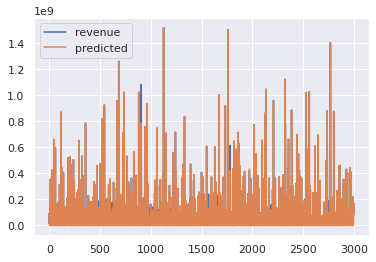

In [78]:
train_set[['revenue', 'predicted']].plot();

In [79]:
test = test_set[features]
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Columns: 9453 entries, Crime to Akio Mitamura
dtypes: float64(2), int64(9450), object(1)
memory usage: 317.2+ MB


In [80]:
test_set['revenue'] = model.predict(test)

In [104]:
test_set[['title', 'revenue', 'release_date']].sort_values('revenue', ascending=False).head(30)

,title,revenue,release_date
3138,Batman v Superman: Dawn of Justice,1.107633e+09,20160323
892,Madagascar: Escape 2 Africa,9.932612e+08,20081030
942,Rogue One: A Star Wars Story,9.928978e+08,20161214
3867,The Hobbit: The Battle of the Five Armies,8.988147e+08,20141210
2155,Harry Potter and the Prisoner of Azkaban,8.634108e+08,20040531
2001,Catch Me If You Can,7.410169e+08,20021225
3662,Alice Through the Looking Glass,7.253595e+08,20160525
1923,Underworld: Rise of the Lycans,7.168183e+08,20090122
3939,Pan's Labyrinth,7.051885e+08,20060527
1492,Chronicles,7.051885e+08,20040516


In [58]:
list_zeros = [1 if len(x) > 24 else 0 for x in features]
model.predict(np.array(list_zeros).reshape(1,-1))

array([92315408.41147459])

In [59]:
genres = input("Movie genre/s? ").split(',')
runtime = input('Runtime? (in minutes) ')
popularity = input('Popularity? (0-100) ')
belongs_to_collection = input('Belongs to collection? [y/n] ')
release_date = input('Release date? (yyyymmdd) ')
prod_companies = input('Production companies? ').split(',')
prod_countries = input('Production countries? ').split(',')
actors = input('Actors? ').split(',')

Movie genre/s?  Comedy
Runtime? (in minutes)  100
Popularity? (0-100)  0
Belongs to collection? [y/n]  y
Release date? (yyyymmdd)  191919191919191
Production companies?  Universal
Production countries?  United States of America
Actors?  Jack Nicholson,Emma Stone,Chris Hemsworth,Chris Evans,Matt Damon,Matthew McConaughey


In [60]:
belongs_to_collection = 1 if belongs_to_collection == 'y' else 0
movie_to_predict = [1 if genre in genres else 0 for genre in GENRES]
movie_to_predict.extend([runtime, popularity, belongs_to_collection, release_date])
movie_to_predict.extend([1 if company in prod_companies else 0 for company in PROD_COMPANIES])
movie_to_predict.extend([1 if country in prod_countries else 0 for country in PROD_COUNTRIES])
movie_to_predict.extend([1 if actor in actors else 0 for actor in CAST])


In [61]:
model.predict(np.array(movie_to_predict).reshape(1,-1))


/home/achille/.local/lib/python3.9/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([9.4280294e+15])

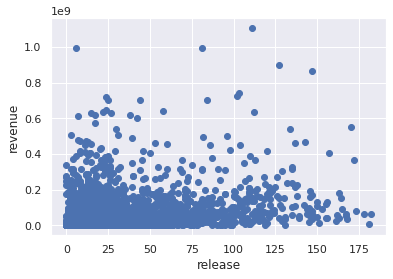

In [111]:
# Let's plot the data now
#x = test_set['release_date']
x = [len(test_set['crew'][i]) for i in range(len(test_set['crew']))]
y = test_set['revenue']

plt.scatter(x,y)
plt.xlabel("release")
plt.ylabel("revenue")
plt.show()

In [109]:
x = [len(test_set['cast'][i]) for i in range(len(test_set['cast']))]
x

[7,
 10,
 9,
 23,
 4,
 9,
 25,
 8,
 18,
 24,
 8,
 18,
 10,
 9,
 25,
 7,
 18,
 41,
 24,
 136,
 20,
 33,
 15,
 6,
 20,
 27,
 13,
 13,
 8,
 15,
 27,
 9,
 3,
 0,
 131,
 62,
 21,
 10,
 25,
 4,
 18,
 15,
 20,
 13,
 56,
 11,
 35,
 15,
 9,
 19,
 9,
 13,
 14,
 9,
 24,
 5,
 21,
 34,
 9,
 47,
 12,
 17,
 36,
 37,
 37,
 47,
 27,
 18,
 17,
 16,
 13,
 29,
 11,
 5,
 19,
 15,
 59,
 40,
 15,
 14,
 17,
 12,
 37,
 13,
 4,
 21,
 15,
 3,
 30,
 18,
 8,
 19,
 16,
 16,
 24,
 23,
 143,
 7,
 26,
 8,
 9,
 11,
 15,
 11,
 18,
 19,
 92,
 25,
 14,
 68,
 11,
 15,
 43,
 20,
 13,
 37,
 7,
 11,
 21,
 21,
 7,
 26,
 17,
 11,
 11,
 11,
 21,
 38,
 50,
 14,
 13,
 8,
 15,
 11,
 11,
 9,
 12,
 13,
 13,
 11,
 10,
 10,
 17,
 11,
 37,
 15,
 9,
 13,
 7,
 12,
 16,
 24,
 11,
 11,
 34,
 13,
 37,
 19,
 8,
 16,
 12,
 17,
 80,
 4,
 6,
 4,
 40,
 6,
 19,
 31,
 43,
 22,
 6,
 10,
 15,
 26,
 31,
 30,
 17,
 14,
 22,
 17,
 11,
 15,
 11,
 22,
 14,
 8,
 46,
 32,
 22,
 7,
 74,
 26,
 15,
 21,
 44,
 21,
 17,
 15,
 9,
 6,
 18,
 16,
 20,
 47,
 23,
 20,